<a href="https://colab.research.google.com/github/SiqiHuang18/ECE239as-Deep-learning/blob/ChrisZhang/CNNShallow_YJ_70_testsubjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from load_data import *
#from RNN_CNN import *
from Shallow_CNN_YJ_70_1 import *

In [3]:
train_loader, test_loader, val_loader, _ = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [0]:
criteria = F.cross_entropy

def train(epoch, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(test_loader=test_loader, mode = 'val', device = None):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [0]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    device = torch.device("cuda")

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch,device)
        stats['train'].append(test(train_loader, mode='train',device = device))
        stats['val'].append(test(val_loader, mode='val',device = device))

    print('Test set result:')
    test(test_loader, mode = 'val',device=device)

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.360997
Train Epoch: 0 [150/199 (71%)]	Loss: 1.492396
train loss: 1.3786, Accuracy: 70/199 (35%)
validation loss: 1.3787, Accuracy: 16/38 (42%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.081565
Train Epoch: 1 [150/199 (71%)]	Loss: 0.899199
train loss: 1.3544, Accuracy: 64/199 (32%)
validation loss: 1.3580, Accuracy: 10/38 (26%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.790288
Train Epoch: 2 [150/199 (71%)]	Loss: 0.702195
train loss: 1.2674, Accuracy: 70/199 (35%)
validation loss: 1.3133, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.695263
Train Epoch: 3 [150/199 (71%)]	Loss: 0.505407
train loss: 1.1849, Accuracy: 67/199 (34%)
validation loss: 1.3640, Accuracy: 11/38 (29%)

Train Epoch: 4 [0/199 (0%)]	Loss: 0.419258
Train Epoch: 4 [150/199 (71%)]	Loss: 0.33780

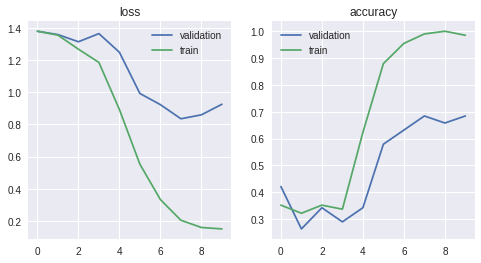

In [6]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.415863
Train Epoch: 0 [150/198 (71%)]	Loss: 1.167798
train loss: 1.3716, Accuracy: 66/198 (33%)
validation loss: 1.3803, Accuracy: 8/38 (21%)

Train Epoch: 1 [0/198 (0%)]	Loss: 0.952660
Train Epoch: 1 [150/198 (71%)]	Loss: 1.182827
train loss: 1.3198, Accuracy: 103/198 (52%)
validation loss: 1.3585, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.957290
Train Epoch: 2 [150/198 (71%)]	Loss: 0.993429
train loss: 1.2558, Accuracy: 130/198 (66%)
validation loss: 1.3377, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.630202
Train Epoch: 3 [150/198 (71%)]	Loss: 0.807054
train loss: 1.0878, Accuracy: 150/198 (76%)
validation loss: 1.2566, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.637060
Train Epoch: 4 [150/198 (71%)]	Loss: 0.706

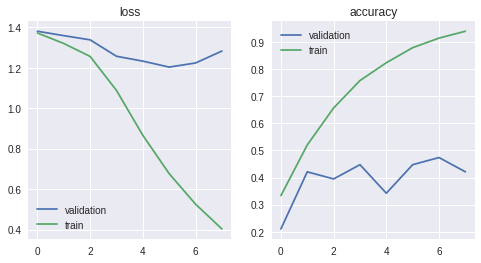

In [8]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.494467
Train Epoch: 0 [150/198 (71%)]	Loss: 1.272137
train loss: 1.3771, Accuracy: 79/198 (40%)
validation loss: 1.3821, Accuracy: 9/38 (24%)

Train Epoch: 1 [0/198 (0%)]	Loss: 0.977619
Train Epoch: 1 [150/198 (71%)]	Loss: 0.751536
train loss: 1.3364, Accuracy: 106/198 (54%)
validation loss: 1.3540, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.681088
Train Epoch: 2 [150/198 (71%)]	Loss: 0.489600
train loss: 1.2040, Accuracy: 126/198 (64%)
validation loss: 1.2612, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.512411
Train Epoch: 3 [150/198 (71%)]	Loss: 0.616286
train loss: 1.0018, Accuracy: 127/198 (64%)
validation loss: 1.1384, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.260277
Train Epoch: 4 [150/198 (71%)]	Loss: 0.396

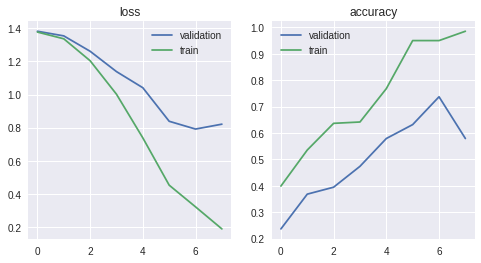

In [9]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.434012
Train Epoch: 0 [150/196 (71%)]	Loss: 1.494846
train loss: 1.3743, Accuracy: 56/196 (29%)
validation loss: 1.3775, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/196 (0%)]	Loss: 1.023986
Train Epoch: 1 [150/196 (71%)]	Loss: 1.053982
train loss: 1.3332, Accuracy: 78/196 (40%)
validation loss: 1.3571, Accuracy: 11/38 (29%)

Train Epoch: 2 [0/196 (0%)]	Loss: 0.868154
Train Epoch: 2 [150/196 (71%)]	Loss: 0.881357
train loss: 1.2229, Accuracy: 118/196 (60%)
validation loss: 1.2977, Accuracy: 20/38 (53%)

Train Epoch: 3 [0/196 (0%)]	Loss: 0.991619
Train Epoch: 3 [150/196 (71%)]	Loss: 0.720644
train loss: 1.0346, Accuracy: 144/196 (73%)
validation loss: 1.2205, Accuracy: 21/38 (55%)

Train Epoch: 4 [0/196 (0%)]	Loss: 0.526887
Train Epoch: 4 [150/196 (71%)]	Loss: 0.556

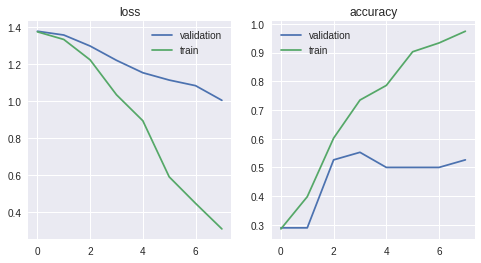

In [10]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.336697
Train Epoch: 0 [150/197 (71%)]	Loss: 1.059198
train loss: 1.3740, Accuracy: 101/197 (51%)
validation loss: 1.3809, Accuracy: 13/38 (34%)

Train Epoch: 1 [0/197 (0%)]	Loss: 0.870979
Train Epoch: 1 [150/197 (71%)]	Loss: 0.696185
train loss: 1.3033, Accuracy: 157/197 (80%)
validation loss: 1.3336, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/197 (0%)]	Loss: 0.532967
Train Epoch: 2 [150/197 (71%)]	Loss: 0.679134
train loss: 1.0503, Accuracy: 162/197 (82%)
validation loss: 1.1659, Accuracy: 21/38 (55%)

Train Epoch: 3 [0/197 (0%)]	Loss: 0.250756
Train Epoch: 3 [150/197 (71%)]	Loss: 0.423117
train loss: 0.7651, Accuracy: 179/197 (91%)
validation loss: 0.9599, Accuracy: 24/38 (63%)

Train Epoch: 4 [0/197 (0%)]	Loss: 0.397718
Train Epoch: 4 [150/197 (71%)]	Loss: 0.3

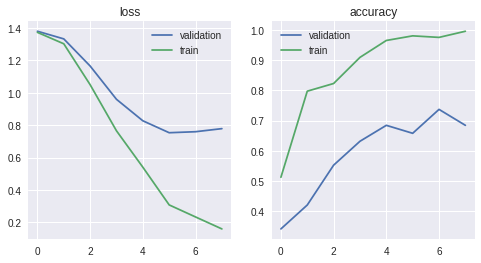

In [11]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.324176
Train Epoch: 0 [150/198 (71%)]	Loss: 1.445248
train loss: 1.3746, Accuracy: 71/198 (36%)
validation loss: 1.3774, Accuracy: 13/38 (34%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.187234
Train Epoch: 1 [150/198 (71%)]	Loss: 0.960842
train loss: 1.3337, Accuracy: 114/198 (58%)
validation loss: 1.3480, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.973196
Train Epoch: 2 [150/198 (71%)]	Loss: 0.883838
train loss: 1.2288, Accuracy: 135/198 (68%)
validation loss: 1.2865, Accuracy: 17/38 (45%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.801175
Train Epoch: 3 [150/198 (71%)]	Loss: 0.602309
train loss: 1.0652, Accuracy: 137/198 (69%)
validation loss: 1.1799, Accuracy: 20/38 (53%)

Train Epoch: 4 [0/198 (0%)]	Loss: 0.662574
Train Epoch: 4 [150/198 (71%)]	Loss: 0.49

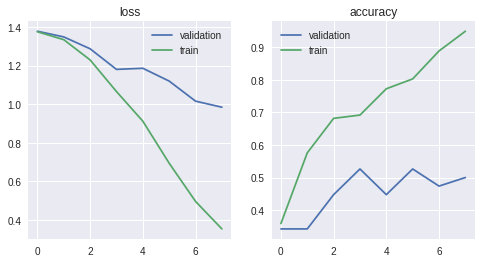

In [18]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/200 (0%)]	Loss: 1.352259
Train Epoch: 0 [150/200 (71%)]	Loss: 0.975269
train loss: 1.3716, Accuracy: 85/200 (42%)
validation loss: 1.3767, Accuracy: 15/38 (39%)

Train Epoch: 1 [0/200 (0%)]	Loss: 0.741979
Train Epoch: 1 [150/200 (71%)]	Loss: 0.540359
train loss: 1.2759, Accuracy: 129/200 (64%)
validation loss: 1.3099, Accuracy: 23/38 (61%)

Train Epoch: 2 [0/200 (0%)]	Loss: 0.358218
Train Epoch: 2 [150/200 (71%)]	Loss: 0.524701
train loss: 1.0039, Accuracy: 157/200 (78%)
validation loss: 1.1244, Accuracy: 22/38 (58%)

Train Epoch: 3 [0/200 (0%)]	Loss: 0.345162
Train Epoch: 3 [150/200 (71%)]	Loss: 0.463798
train loss: 0.7753, Accuracy: 166/200 (83%)
validation loss: 1.0020, Accuracy: 27/38 (71%)

Train Epoch: 4 [0/200 (0%)]	Loss: 0.305406
Train Epoch: 4 [150/200 (71%)]	Loss: 0.25

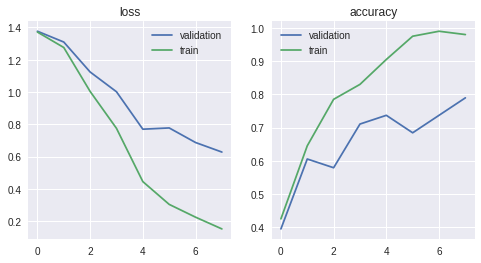

In [13]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.554959
Train Epoch: 0 [150/194 (71%)]	Loss: 1.265453
train loss: 1.3749, Accuracy: 52/194 (27%)
validation loss: 1.3787, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.076330
Train Epoch: 1 [150/194 (71%)]	Loss: 0.900835
train loss: 1.3296, Accuracy: 73/194 (38%)
validation loss: 1.3528, Accuracy: 12/38 (32%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.685077
Train Epoch: 2 [150/194 (71%)]	Loss: 0.482191
train loss: 1.2100, Accuracy: 111/194 (57%)
validation loss: 1.2862, Accuracy: 14/38 (37%)

Train Epoch: 3 [0/194 (0%)]	Loss: 0.566455
Train Epoch: 3 [150/194 (71%)]	Loss: 0.459952
train loss: 0.9618, Accuracy: 153/194 (79%)
validation loss: 1.1323, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/194 (0%)]	Loss: 0.331205
Train Epoch: 4 [150/194 (71%)]	Loss: 0.410

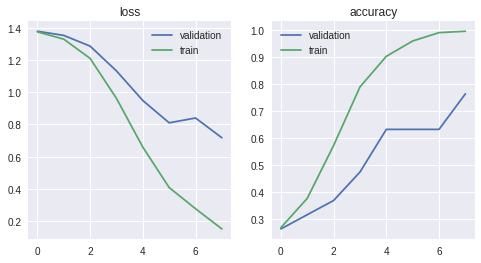

In [14]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 8)

Train data shape:  (193, 22, 1000)
Train labels shape:  (193,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/193 (0%)]	Loss: 1.419879
Train Epoch: 0 [150/193 (71%)]	Loss: 1.007252
train loss: 1.3819, Accuracy: 47/193 (24%)
validation loss: 1.3824, Accuracy: 9/38 (24%)

Train Epoch: 1 [0/193 (0%)]	Loss: 0.833783
Train Epoch: 1 [150/193 (71%)]	Loss: 0.594309
train loss: 1.3415, Accuracy: 62/193 (32%)
validation loss: 1.3548, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/193 (0%)]	Loss: 0.592212
Train Epoch: 2 [150/193 (71%)]	Loss: 0.470511
train loss: 1.2659, Accuracy: 64/193 (33%)
validation loss: 1.3115, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/193 (0%)]	Loss: 0.378330
Train Epoch: 3 [150/193 (71%)]	Loss: 0.430531
train loss: 0.9714, Accuracy: 128/193 (66%)
validation loss: 1.1199, Accuracy: 19/38 (50%)

Train Epoch: 4 [0/193 (0%)]	Loss: 0.234455
Train Epoch: 4 [150/193 (71%)]	Loss: 0.29375

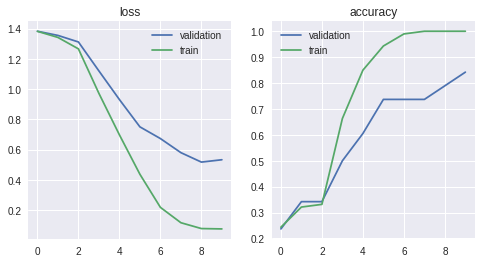

In [17]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.461512
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.381383
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.245022
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.051446
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.017681
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.194134
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.137611
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.074635
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.177811
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.379746
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.239698
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.200324
train loss: 1.0779, Accuracy: 983/1782 (55%)
validation loss: 1.1793, Accuracy: 170/333 (51%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 1.360104
Train Epoch: 1 [150/1782 (8%)]	Loss

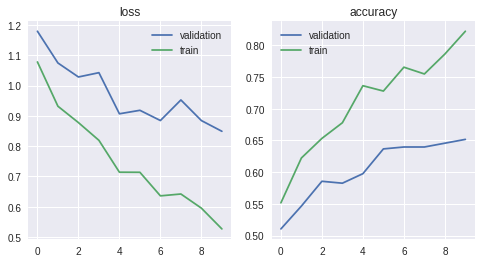

In [20]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = CNN_Shallow().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val',device=device)